# Hyperparameters Tuning for Heart Disease Prediction using Logisticregression

   In order to improve the performance of a machine learning model, it is of high importance to optimize the hyperparameters. These hyperparameters which are not determined by the learning algorithm itself may be the regularization factor for linear models or learning rate for gradient descend-based learning algorithms. Bayesian Optimization (BO) is a highly regarded approach for optimizing hyperparameters. In this notebook, we use the example of heart disease prediction to clarify how this method can be effective for hyperparameters tuning.
   
References:

    [1] https://www.kaggle.com/ronitf/heart-disease-uci
    [2] "Statistics and Machine Learning in Python"; Edouard Duchesnay, Tommy Löfstedt, Feki Younes; Oct 2020.
    [3] https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
filename = 'heart.csv'
df = read_csv(filename)

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data = df.values

In [6]:
X = heart_data[:, 0:13]
Y = heart_data[:, 13]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_X = scaler.fit_transform(X)

In [7]:
my_test_size = 0.1
seed = 2 
X_train, X_test, Y_train, Y_test = train_test_split(rescaled_X, Y, test_size=my_test_size , random_state=seed)

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [9]:
num_folds = 5
logreg = lm.LogisticRegression(C=1e8, solver='lbfgs') #With ignorable regularization
clf=logreg
kfold = KFold(n_splits=5)
results = cross_val_score(clf, X_train, Y_train, cv=kfold)
results.mean()

0.8271380471380473

In [10]:
def f(log_c=5):
    logreg = lm.LogisticRegression(C=pow(10.0, log_c[0]), solver = 'lbfgs')
    clf = logreg
    num_folds = 5
    kfold = KFold(n_splits=5)
    return -cross_val_score(clf, X_train, Y_train, cv=kfold).mean()

In [11]:
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process
from skopt import gp_minimize
from skopt.plots import plot_convergence


The Bayesian Optimizatoin with "Expected Improvement" acquisition function

In [12]:
%%time
res = gp_minimize(f,                  # the function to minimize
                  [(-1.0, 8.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=90,         # the number of evaluations of f
                  n_random_starts=8,  # the number of random initialization points
                  noise=0)            # the noise level (optional)
                  

Wall time: 30.8 s


In [13]:
"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)

'x^*=1.3833, f(x^*)=-0.8308'

The Bayesian Optimizatoin with "Lower Confidence Bound" acquisition function:

In [14]:
%%time
res2 = gp_minimize(f,                  # the function to minimize
                  [(-1.0, 8.0)],          # the bounds on each dimension of x
                  acq_func="LCB",      # the acquisition function
                  n_calls=90,         # the number of evaluations of f
                  n_random_starts=8,  # the number of random initialization points
                  noise=0)             # the noise level (optional)

Wall time: 40.6 s


In [15]:
"x^*=%.4f, f(x^*)=%.4f" % (res2.x[0], res2.fun)

'x^*=1.4637, f(x^*)=-0.8308'

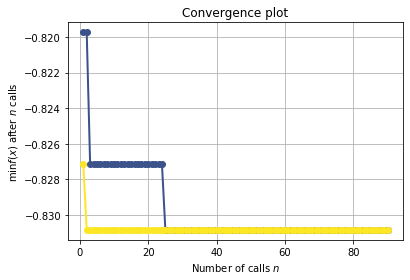

In [16]:
plot_convergence(res, res2)